# GO semantic similarity analysis

In [1]:
suppressPackageStartupMessages({
    library(dplyr)
    library(ggplot2)
    library(GOSemSim)
    library(org.Hs.eg.db)
})

## Functions

In [2]:
get_semData <- function(ont){
    return(godata('org.Hs.eg.db', ont=ont))
}

GO_semantic_similarity <- function(ont){
    hsGO = get_semData(ont)
    mods = data.table::fread("../../../_m/modules.csv", head=TRUE) %>% distinct(module)
    mod1 = c(); mod2 = c(); ss = c()
    for(module1 in mods$module){
        fn1 = paste0("../../_m/GO_analysis_module_",module1,".xlsx")
        for(module2 in mods$module){
            fn2 = paste0("../../_m/GO_analysis_module_",module2,".xlsx")
            if(module1 != module2 & file.exists(fn1) & file.exists(fn2)){
                df1 = readxl::read_excel(fn1) %>% filter(NS == ont)
                df2 = readxl::read_excel(fn2) %>% filter(NS == ont)
                sim = mgoSim(df1$GO, df2$GO, semData=hsGO, 
                             measure="Wang", combine="BMA")
                mod1 = c(mod1, module1); mod2 = c(mod2, module2)
                ss = c(ss, sim)
            }
        }
    }
    return(data.frame("Module_1"=mod1, "Module_2"=mod2, "Semantic_Similarity"=ss, "Ont"=ont))
}

save_img <- function(image, fn, w=7, h=7){
    for(ext in c(".pdf", ".png")){
        ggsave(file=paste0(fn, ext), plot=image, width=w, height=h)
    }
}   

## Semantic similarity analysis

In [3]:
datalist = list()
for(ont in c("MF", "BP", "CC")){
    datalist[[ont]] = GO_semantic_similarity(ont)
}
dt = bind_rows(datalist)
dt["Tissue"] = "Hippocampus"
dt %>% data.table::fwrite("go_semantic_similarity.tsv", sep='\t')
dt %>% head

preparing gene to GO mapping data...

preparing IC data...

preparing gene to GO mapping data...

preparing IC data...

preparing gene to GO mapping data...

preparing IC data...



,Module_1,Module_2,Semantic_Similarity,Ont
,<chr>,<chr>,<dbl>,<chr>
1,grey,pink,0.357,MF
2,grey,darkgreen,NA,MF
3,grey,black,0.417,MF
4,grey,turquoise,0.347,MF
5,grey,blue,0.403,MF
6,grey,green,NA,MF


## Plot semantic similarity

### All modules

In [ ]:
tile_plot <- dt %>% #tidyr::drop_na() %>% 
    ggplot(aes(x=Module_1, y=Module_2, fill=Semantic_Similarity, 
               label=format(round(Semantic_Similarity, 1)))) + 
    geom_tile(color="grey") + ggfittext::geom_fit_text(contrast=TRUE) + 
    viridis::scale_color_viridis(option="magma") + facet_wrap("~Ont") +
    viridis::scale_fill_viridis(name="Semantic Similarity", 
                                direction=-1, option="magma") +
    labs(x="", y="") + ggpubr::theme_pubr(base_size=15, border=TRUE) +
    theme(axis.text.x=element_text(angle = 45, hjust=1), 
          strip.text=element_text(face="bold"), 
          legend.key.width=unit(2, 'cm'))
tile_plot

In [ ]:
save_img(tile_plot, "GO_semantic_similarity_all", w=21, h=9)

### Significant correlations

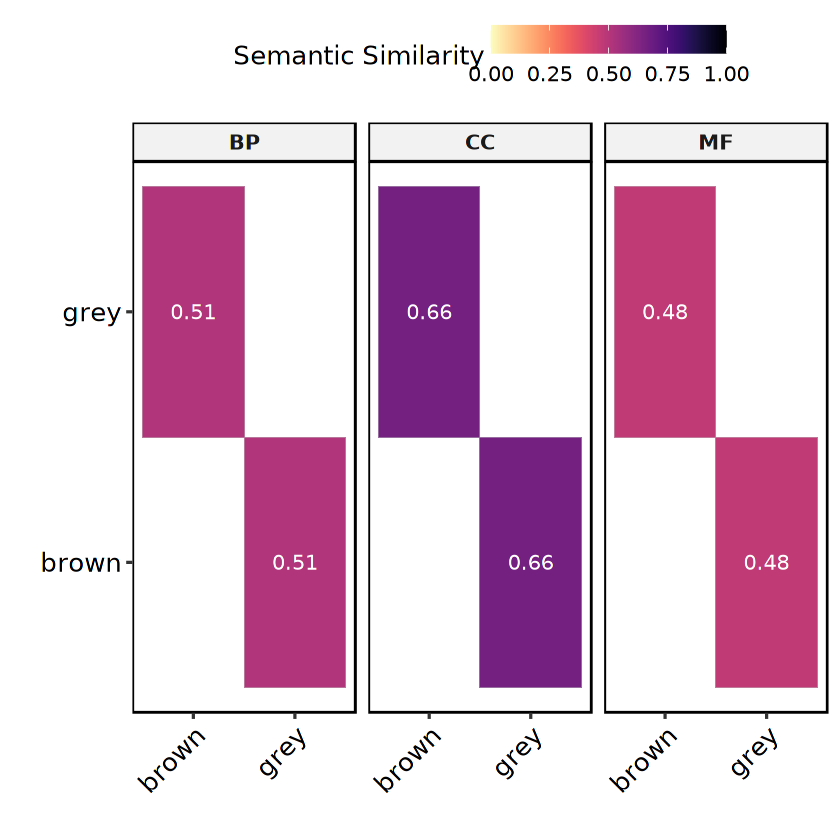

In [4]:
sig_mods = c("grey", "brown", "royalblue", "saddlebrown")
tile_plot_sig = dt %>% #tidyr::drop_na() %>% 
    filter(Module_1 %in% sig_mods, Module_2 %in% sig_mods) %>%
    ggplot(aes(x=Module_1, y=Module_2, fill=Semantic_Similarity, 
               label=format(round(Semantic_Similarity, 2)))) + 
    geom_tile(color="grey") + ggfittext::geom_fit_text(contrast=TRUE) + 
    viridis::scale_color_viridis(option="magma") + facet_wrap("~Ont") +
    viridis::scale_fill_viridis(name="Semantic Similarity", limits=c(0,1),
                                direction=-1, option="magma") +
    labs(x="", y="") + ggpubr::theme_pubr(base_size=15, border=TRUE) +
    theme(axis.text.x=element_text(angle = 45, hjust=1), 
          strip.text=element_text(face="bold"), 
          legend.key.width=unit(1, 'cm'))
save_img(tile_plot_sig, "GO_semantic_similarity_sig", w=10, h=5)
tile_plot_sig

## Reproducibility Information

In [ ]:
Sys.time()
proc.time()
options(width = 120)
sessioninfo::session_info()